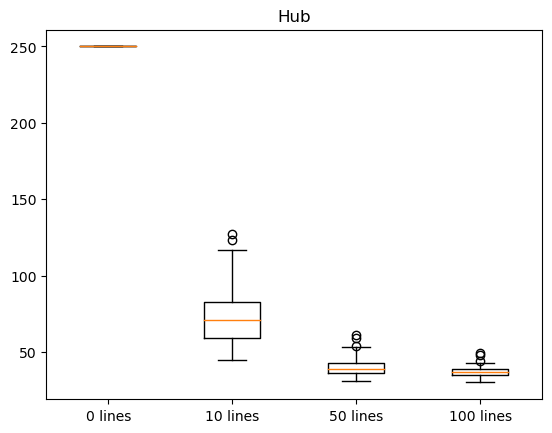

In [64]:
#####Hub#####

import numpy as np
import random
import matplotlib.pyplot as plt

def Hub(n, l):
    #nqbitsの作成
    q={}
    q[f"q{0}"]=1
    #n=500
    for i in range(1, n):
        q[f"q{i}"]=0
    #print(q)
    #print()

    #繋がっているqbitの辞書
    qcon={}
    qcon[f"q{0}"]={f"q{n-1}":q[f"q{n-1}"], f"q{1}":q[f"q{1}"]}
    #qcon
    for i in range(1, n-1):
        qcon[f"q{i}"]={f"q{i-1}":q[f"q{i-1}"], f"q{i+1}":q[f"q{i+1}"]}
    qcon[f"q{n-1}"]={f"q{n-2}":q[f"q{n-2}"], f"q{0}":q[f"q{0}"]}

    s = random.sample(list(q.keys()),l)
    #print(s)
    for i in s:
        qcon["q0"][i]=q[i]
        qcon[i]["q0"]=q["q0"]

    #print(qcon)

    #1の伝染
    count=0
    while True:
        qfin=[]
        for i in range(n):
            if q[f"q{i}"]==1:
                if f"q{i}" not in qfin:
                    qcon_keys=list(qcon[f"q{i}"].keys())
                    random.shuffle(qcon_keys)
                    for j in qcon_keys:
                        if q[j]==0:
                            q[j]=1
                            qfin.append(j)
                            break
        count=count+1
        if all(k==1 for k in q.values()):
            break
    #print(count)
    
    return count


count_all_0 = []
i = 1
while i<100:
    count_new=Hub(500, 0)
    count_all_0.append(count_new)
    i = i+1


count_all_1 = []
i = 1
while i<100:
    count_new=Hub(500, 10)
    count_all_1.append(count_new)
    i = i+1
    
count_all_2 = []
i = 1
while i<100:
    count_new=Hub(500, 50)
    count_all_2.append(count_new)
    i = i+1
    
count_all_3 = []
i = 1
while i<100:
    count_new=Hub(500, 100)
    count_all_3.append(count_new)
    i = i+1

plt.boxplot([count_all_0, count_all_1, count_all_2, count_all_3], labels=["0 lines", "10 lines", "50 lines", "100 lines"])
plt.title("Hub")
plt.show() #丸は外れ値

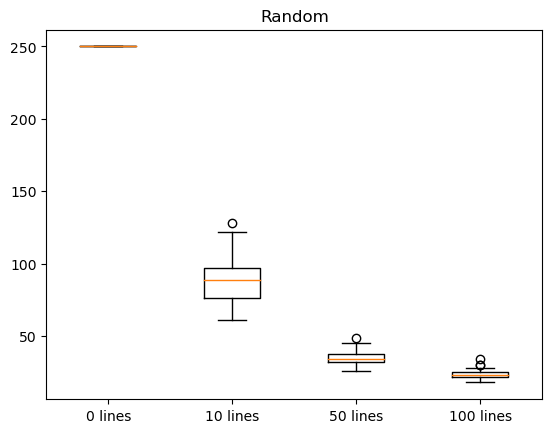

In [65]:
#####Random#####

import numpy as np
import random
import matplotlib.pyplot as plt

def Random(n, l):
    #nqbitsの作成
    q={}
    q[f"q{0}"]=1
    #n=500
    for i in range(1, n):
        q[f"q{i}"]=0
    #print(q)
    #print()

    #繋がっているqbitの辞書
    qcon={}
    qcon[f"q{0}"]={f"q{n-1}":q[f"q{n-1}"], f"q{1}":q[f"q{1}"]}
    #qcon
    for i in range(1, n-1):
        qcon[f"q{i}"]={f"q{i-1}":q[f"q{i-1}"], f"q{i+1}":q[f"q{i+1}"]}
    qcon[f"q{n-1}"]={f"q{n-2}":q[f"q{n-2}"], f"q{0}":q[f"q{0}"]}

    for _ in range(l):
        i, j = random.sample(list(q.keys()), 2)
        qcon[i][j]=q[j]
        qcon[j][i]=q[i]
    #print(qcon)

    #1の伝染
    count=0
    while True:
        qfin=[]
        for i in range(n):
            if q[f"q{i}"]==1:
                if f"q{i}" not in qfin:
                    qcon_keys=list(qcon[f"q{i}"].keys())
                    random.shuffle(qcon_keys)
                    for j in qcon_keys:
                        if q[j]==0:
                            q[j]=1
                            qfin.append(j)
                            break
        count=count+1
        if all(k==1 for k in q.values()):
            break
    #print(count)
    
    return count


count_all_0 = []
i = 1
while i<100:
    count_new=Random(500, 0)
    count_all_0.append(count_new)
    i = i+1


count_all_1 = []
i = 1
while i<100:
    count_new=Random(500, 10)
    count_all_1.append(count_new)
    i = i+1
    
count_all_2 = []
i = 1
while i<100:
    count_new=Random(500, 50)
    count_all_2.append(count_new)
    i = i+1
    
count_all_3 = []
i = 1
while i<100:
    count_new=Random(500, 100)
    count_all_3.append(count_new)
    i = i+1

plt.boxplot([count_all_0, count_all_1, count_all_2, count_all_3], labels=["0 lines", "10 lines", "50 lines", "100 lines"])
plt.title("Random")
plt.show() #丸は外れ値